# Objective 
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
len(df['Request id'].unique())

6745

In [4]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df.shape

(6745, 6)

In [6]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
df['Request timestamp'].value_counts()

11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 17:57        6
11/7/2016 8:37         6
12/7/2016 21:42        5
                      ..
14-07-2016 19:25:41    1
11/7/2016 10:56        1
12/7/2016 13:20        1
13-07-2016 16:01:54    1
13-07-2016 05:31:53    1
Name: Request timestamp, Length: 5618, dtype: int64

In [9]:
df['Request timestamp']=df['Request timestamp'].astype(str)
df['Request timestamp']=df['Request timestamp'].replace('/','-')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [11]:
df['Drop timestamp'].value_counts()

12/7/2016 21:04        4
11/7/2016 13:00        4
12/7/2016 21:53        4
12/7/2016 6:22         4
11/7/2016 8:55         3
                      ..
12/7/2016 8:22         1
11/7/2016 17:32        1
11/7/2016 19:37        1
12/7/2016 17:33        1
13-07-2016 22:54:33    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [12]:
df['Drop timestamp']=df['Drop timestamp'].astype(str)
df['Drop timestamp']=df['Drop timestamp'].replace('/','-')
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
req_hour=df['Request timestamp'].dt.hour
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [14]:
len(req_hour)

6745

In [15]:
df['req_hour']=req_hour

In [16]:
req_day=df['Request timestamp'].dt.hour
df['req_day']=req_day

In [17]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,8


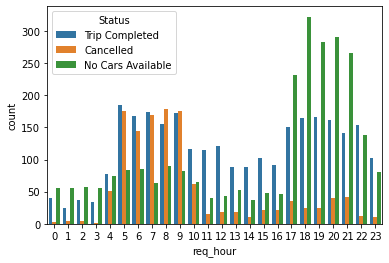

In [18]:
sns.countplot(x="req_hour",data=df,hue="Status")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


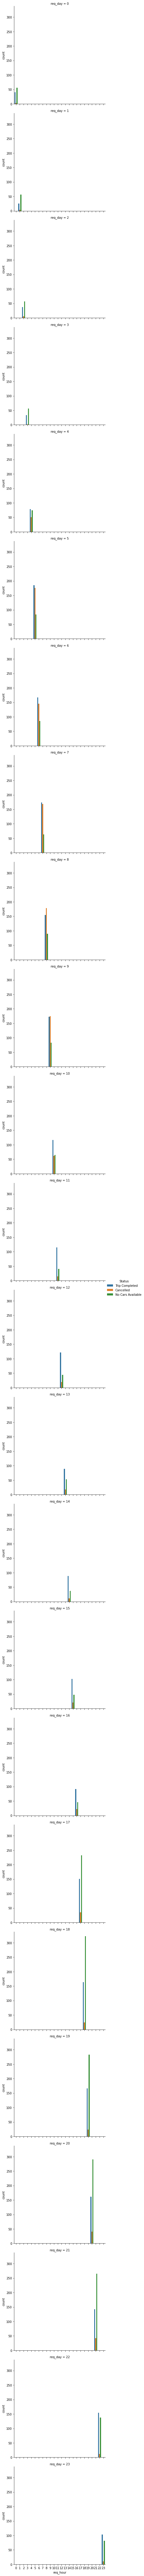

In [19]:
sns.factorplot(x='req_hour',data=df, row= 'req_day',hue='Status',kind='count')
plt.show()

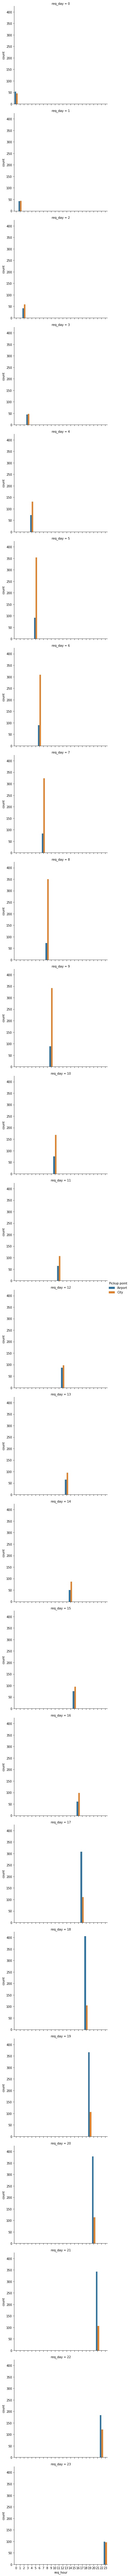

In [20]:
sns.factorplot(x='req_hour',data=df,row='req_day',hue='Pickup point',kind='count')
plt.show()

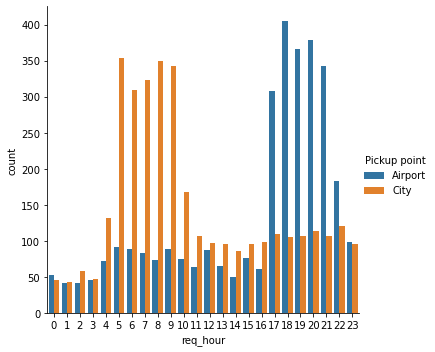

In [21]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

Insights:
1. During morning time most of the cars are booked from city. 
2. During night time most of the cars are b ooked from airport. 

In [22]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,8
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,23


In [23]:
df['Time slot']=0
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,17,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,21,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,8,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,23,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,23,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,23,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,23,0


In [24]:
j=0
for i in df['req_hour']:
    if df.iloc[j,6] < 5:
        df.iloc[j,8]='Pre Morning'
    elif 5<df.iloc[j,6]<10:
        df.iloc[j,8]= 'Morning Rush'
    elif 10<df.iloc[j,6]<17:
        df.iloc[j,8]= 'Day Time'
    elif 17<df.iloc[j,6]<22:
        df.iloc[j,8]=' Evening Rush'
    else:
        df.iloc[j,8]= 'Night Time'
    j=j+1

In [25]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,17,Night Time
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,21,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,8,Morning Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,23,Night Time
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,23,Night Time
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,23,Night Time
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,23,Night Time


In [26]:
df['Time slot'].value_counts()

 Evening Rush    1924
Morning Rush     1658
Night Time       1604
Day Time          981
Pre Morning       578
Name: Time slot, dtype: int64

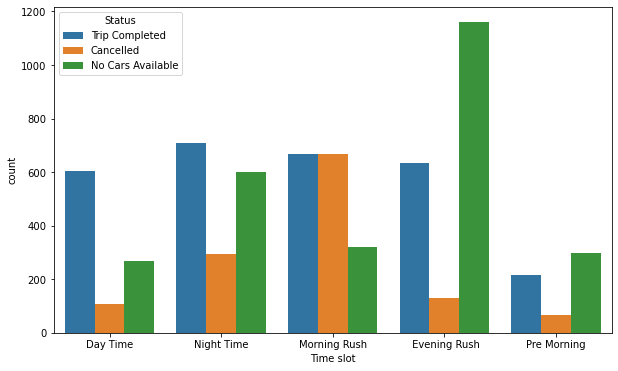

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Time slot', data=df, hue='Status')
plt.show()

Insights: 
1. In evening time most of the time cars are not available for customers. 
2. In morning time the cancellation rate is more than other time slot. 

# Sevirity of problem by location and their count (for each time slot)

# Morning Rush

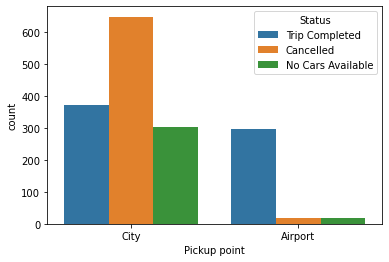

In [28]:
df_morning = df[df['Time slot']== 'Morning Rush']
sns.countplot(x='Pickup point',hue='Status',data=df_morning)
plt.show()

Most of trips are cancelled from city during morning rush. Also cars not avalable problem is more in city. 

In [29]:
df_morning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,8,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,6,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,6,Morning Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,8,Morning Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,9,Morning Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,9,Morning Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,9,Morning Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,9,Morning Rush


In [30]:
df_morning.loc[(df_morning["Pickup point"]=="City")].shape[0]

1324

In [31]:
df_morning.loc[(df_morning["Pickup point"]=="Airport")].shape[0]

334

In [32]:
print('Trip Cancelled from city is',df_morning.loc[(df_morning["Pickup point"]=="City") & (df_morning["Status"]=="Cancelled")].shape[0])
print('Trip cancelled from airport is', df_morning.loc[(df_morning['Pickup point']== 'Airport')&(df_morning['Status']=='Cancelled')].shape[0] 
)

Trip Cancelled from city is 648
Trip cancelled from airport is 19


In [33]:
print('Trip completed from city is',df_morning.loc[(df_morning['Pickup point']=='City')&(df_morning['Status']=='Trip Completed')].shape[0])
print('Trip completed from airport is',df_morning.loc[(df_morning['Pickup point']=='Airport')&(df_morning['Status']=='Trip Completed')].shape[0])

Trip completed from city is 372
Trip completed from airport is 297


In [34]:
print('No car available from city is',df_morning.loc[(df_morning['Pickup point']=='City')&(df_morning['Status']=='No Cars Available')].shape[0])
print('No car available from airport is',df_morning.loc[(df_morning['Pickup point']=='Airport')&(df_morning['Status']=='No Cars Available')].shape[0])

No car available from city is 304
No car available from airport is 18


During morning rush most of the trips are cancelled from city and many customers get no cars avalable messge from city only.  

# Evening Rush


In [38]:
df_even=df[df['Time slot']==' Evening Rush']
df_even

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,21,Evening Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,21,Evening Rush
19,960,Airport,3.0,Trip Completed,2016-07-11 18:45:00,2016-07-11 19:23:00,18,18,Evening Rush
22,2211,Airport,3.0,Trip Completed,2016-07-12 18:00:00,2016-07-12 18:28:00,18,18,Evening Rush
24,3881,Airport,3.0,Trip Completed,2016-07-13 21:54:18,2016-07-13 22:51:23,21,21,Evening Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,21,Evening Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,21,Evening Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,21,Evening Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,21,Evening Rush


In [37]:
df['Time slot'].value_counts()

 Evening Rush    1924
Morning Rush     1658
Night Time       1604
Day Time          981
Pre Morning       578
Name: Time slot, dtype: int64

In [39]:
df_even.loc[(df_even["Pickup point"]=="City")].shape[0]

432

In [40]:
df_even.loc[(df_even["Pickup point"]=="Airport")].shape[0]

1492

In [41]:
print('Trip Cancelled from city is',df_even.loc[(df_even["Pickup point"]=="City") & (df_even["Status"]=="Cancelled")].shape[0])
print('Trip cancelled from airport is', df_even.loc[(df_even['Pickup point']== 'Airport')&(df_even['Status']=='Cancelled')].shape[0] 
)

Trip Cancelled from city is 44
Trip cancelled from airport is 87


In [43]:
print('No cars available from city is',df_even.loc[(df_even["Pickup point"]=="City") & (df_even["Status"]=="No Cars Available")].shape[0])
print('No cars available from airport is', df_even.loc[(df_even['Pickup point']== 'Airport')&(df_even['Status']=='No Cars Available')].shape[0] 
)

No cars available from city is 54
No cars available from airport is 1106


In [44]:
print('Trip Completed from city is',df_even.loc[(df_even["Pickup point"]=="City") & (df_even["Status"]=="Trip Completed")].shape[0])
print('Trip Completed from airport is', df_even.loc[(df_even['Pickup point']== 'Airport')&(df_even['Status']=='Trip Completed')].shape[0] 
0)

Trip Completed from city is 334
Trip Completed from airport is 299


During evening rush time no cars available from airport is the major problem. 

# Night Time

In [46]:
df_night=df[df['Time slot']=='Night Time']
df_night

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,17,Night Time
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,5,Night Time
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,17,Night Time
10,1467,Airport,2.0,Trip Completed,2016-07-12 05:08:00,2016-07-12 06:02:00,5,5,Night Time
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,17,Night Time
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,23,Night Time
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,23,Night Time
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,23,Night Time
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,23,Night Time


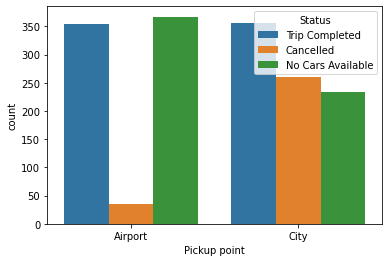

In [48]:
sns.countplot(x='Pickup point',hue='Status',data=df_night)
plt.show()

In [53]:
df_night.loc[(df_night['Pickup point']=='City')].shape[0]

848

In [54]:
df_night.loc[(df_night['Pickup point']=='Airport')].shape[0]

756

In [58]:
print('Trip cancelled from city', df_night.loc[(df_night['Pickup point']=='City')&(df_night['Status']=='Cancelled')].shape[0])
print('Trip cancelled from airport', df_night.loc[(df_night['Pickup point']=='Airport')&(df_night['Status']=='Cancelled')].shape[0])

Trip cancelled from city 260
Trip cancelled from airport 35


In [59]:
print('Nocars available from city', df_night.loc[(df_night['Pickup point']=='City')&(df_night['Status']=='No Cars Available')].shape[0])
print('Nocars available from airport', df_night.loc[(df_night['Pickup point']=='Airport')&(df_night['Status']=='No Cars Available')].shape[0])

Nocars available from city 233
Nocars available from airport 367


In [60]:
print('Trip completed from city', df_night.loc[(df_night['Pickup point']=='City')&(df_night['Status']=='Trip Completed')].shape[0])
print('Trip completed from airport', df_night.loc[(df_night['Pickup point']=='Airport')&(df_night['Status']=='Trip Completed')].shape[0])

Trip completed from city 355
Trip completed from airport 354


During night time cancellation rate is more from city and no cars available count is more from airport. 

# Day Time

In [61]:
df_day=df[df['Time slot']=='Day Time']
df_day

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,12,Day Time
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,14,14,Day Time
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,12,Day Time
20,1934,Airport,3.0,Trip Completed,2016-07-12 11:17:00,2016-07-12 12:23:00,11,11,Day Time
...,...,...,...,...,...,...,...,...,...
6420,6170,City,NaN,No Cars Available,2016-07-15 16:44:22,NaT,16,16,Day Time
6421,6166,City,NaN,No Cars Available,2016-07-15 16:46:33,NaT,16,16,Day Time
6422,6172,City,NaN,No Cars Available,2016-07-15 16:47:39,NaT,16,16,Day Time
6423,6171,City,NaN,No Cars Available,2016-07-15 16:51:23,NaT,16,16,Day Time


In [62]:
df_day.loc[(df_day['Pickup point']=='City')].shape[0]

578

In [63]:
df_day.loc[(df_day['Pickup point']=='Airport')].shape[0]

403

In [64]:
print('Trip cancelled from city', df_day.loc[(df_day['Pickup point']=='City')&(df_day['Status']=='Cancelled')].shape[0])
print('Trip cancelled from airport', df_day.loc[(df_day['Pickup point']=='Airport')&(df_day['Status']=='Cancelled')].shape[0])

Trip cancelled from city 51
Trip cancelled from airport 55


In [65]:
print('No cars available from city', df_day.loc[(df_day['Pickup point']=='City')&(df_day['Status']=='No Cars Available')].shape[0])
print('No cars available from airport', df_day.loc[(df_day['Pickup point']=='Airport')&(df_day['Status']=='No Cars Available')].shape[0])

No cars available from city 195
No cars available from airport 74


In [66]:
print('Trip completed from city', df_day.loc[(df_day['Pickup point']=='City')&(df_day['Status']=='Trip Completed')].shape[0])
print('Trip completed from airport', df_day.loc[(df_day['Pickup point']=='Airport')&(df_day['Status']=='Trip Completed')].shape[0])

Trip completed from city 332
Trip completed from airport 274


In day time trip completion rate is more then cancellation. Also the cars availability is less from city. 

# Pre Morning 

In [67]:
df_premorning = df[df['Time slot']=='Pre Morning']
df_premorning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time slot
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,4,4,Pre Morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,2,2,Pre Morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,2,2,Pre Morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,2,2,Pre Morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,0,0,Pre Morning
...,...,...,...,...,...,...,...,...,...
6220,5490,City,NaN,No Cars Available,2016-07-15 04:50:21,NaT,4,4,Pre Morning
6221,5483,Airport,NaN,No Cars Available,2016-07-15 04:51:09,NaT,4,4,Pre Morning
6222,5482,City,NaN,No Cars Available,2016-07-15 04:51:13,NaT,4,4,Pre Morning
6223,5485,Airport,NaN,No Cars Available,2016-07-15 04:54:24,NaT,4,4,Pre Morning


In [68]:
df_premorning.loc[(df_premorning['Pickup point']=='City')].shape[0]

325

In [69]:
df_premorning.loc[(df_premorning['Pickup point']=='Airport')].shape[0]

253

In [70]:
print('Trip cancelled from city', df_premorning.loc[(df_premorning['Pickup point']=='City')&(df_premorning['Status']=='Cancelled')].shape[0])
print('Trip cancelled from airport', df_premorning.loc[(df_premorning['Pickup point']=='Airport')&(df_premorning['Status']=='Cancelled')].shape[0])

Trip cancelled from city 63
Trip cancelled from airport 2


In [71]:
print('No cars available from city', df_premorning.loc[(df_premorning['Pickup point']=='City')&(df_premorning['Status']=='No Cars Available')].shape[0])
print('No cars available from airport', df_premorning.loc[(df_premorning['Pickup point']=='Airport')&(df_premorning['Status']=='No Cars Available')].shape[0])

No cars available from city 151
No cars available from airport 148


In [72]:
print('Trip completed from city', df_premorning.loc[(df_premorning['Pickup point']=='City')&(df_premorning['Status']=='Trip Completed')].shape[0])
print('Trip completed from airport', df_premorning.loc[(df_premorning['Pickup point']=='Airport')&(df_premorning['Status']=='Trip Completed')].shape[0])

Trip completed from city 111
Trip completed from airport 103


In pre morning time trip cancellation rate is more from city. Also from city and airport cars not available from morning. 

Conclusion: 
1. During evening rush time from airport most of custemers will not get cars. This is the major problem with high numbers. 
2. In morning time most of the customers will cancelled the trip from city, also many times customers will not get cars from city area. 

# END